<a href="https://colab.research.google.com/github/ARSHITHbabu/CIFAR-10-Gen-GAN/blob/main/CIFAR_10_Gen_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***1) IMPORTS***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Reshape, Flatten, Input, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10


## ***2) Load and Preprocess CIFAR-10 Dataset***

In [ ]:
(X_train, _), (_, _) = cifar10.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)


## ***3) Define Parameters***

In [ ]:
latent_dim = 100
adam = Adam(learning_rate=0.0002, beta_1=0.5)


## ***4) Define Generator***

In [ ]:
def build_generator():
    model = Sequential()
    model.add(Dense(256 * 8 * 8, input_dim=latent_dim))
    model.add(Reshape((8, 8, 256)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))

    model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))

    model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))

    model.add(Conv2DTranspose(3, kernel_size=4, strides=1, padding='same', activation='tanh'))
    return model

generator = build_generator()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## ***5) Define Discriminator***

In [ ]:
def build_discriminator():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))
    model.add(Conv2D(64, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


## ***6) Create GAN***

In [ ]:
discriminator.trainable = False
gan_input = Sequential()
gan_input.add(generator)
gan_input.add(discriminator)
gan_input.compile(loss='binary_crossentropy', optimizer=adam)


## ***7) Train GAN Function***

In [ ]:
def train_gan(epochs=300, batch_size=128):
    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]
        noise = np.random.uniform(-1, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))

        d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1])

        noise = np.random.uniform(-1, 1, (batch_size, latent_dim))
        g_loss = gan_input.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | D Loss: {d_loss:.4f} | D Acc.: {d_acc:.4f} | G Loss: {g_loss[0]:.4f}")


## ***8) Plot Generated and Real Images***

In [ ]:
def plot_generated_images(examples=10, dim=(2, 10), figsize=(15, 6)):
    noise = np.random.uniform(-1, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2

    plt.figure(figsize=figsize)

    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(X_train[np.random.randint(0, X_train.shape[0])])
        plt.axis('off')
        plt.title('Real Image', fontsize=8)

    for i in range(examples):
        plt.subplot(dim[0], dim[1], examples + i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
        plt.title('Generated Image', fontsize=8)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
    plt.show()


## ***9) Start Training***

In [ ]:
train_gan(epochs=350, batch_size=128)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch: 0 | D Loss: 0.7007 | D Acc.: 0.4062 | G Loss: 0.6983
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━

## ***10) Plot After Training***


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


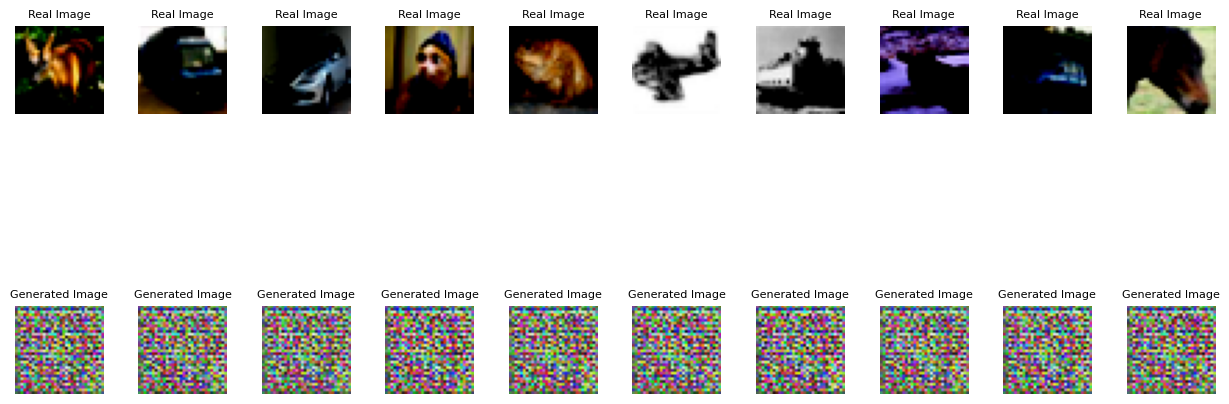

In [ ]:
plot_generated_images(examples=10, dim=(2, 10), figsize=(15, 6))
